 # **<span style="color:#6daa9f;">TABLE OF CONTENTS</span>**
 

**IMPORTING LIBRARIES**

**LOADING DATA**

**DATA ANALYSIS**

**DATA PREPROCESSING**

**MODEL BUILDING**

**CONCLUSIONS**

# **<span style="color:#6daa9f;">IMPORTING LIBRARIES</span>**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# **<span style="color:#6daa9f;">LOADING DATA</span>**

In [3]:
url = "C:/Users/user/Downloads/heart.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**About the data:**

###### age
###### sex
###### chest pain type (4 values)
###### resting blood pressure
###### serum cholestoral in mg/dl
###### fasting blood sugar > 120 mg/dl
###### resting electrocardiographic results (values 0,1,2)
###### maximum heart rate achieved
###### exercise induced angina
###### oldpeak = ST depression induced by exercise relative to rest
###### the slope of the peak exercise ST segment
###### number of major vessels (0-3) colored by flourosopy
###### thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [5]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    


# **<span style="color:#6daa9f;">DATA ANALYSIS</span>**

Steps in data analysis and visulisation:

We begin our analysis by plotting a count plot of the targer attribute. 
A corelation matrix of the various attributes to examine the feature importance.

<AxesSubplot:xlabel='target', ylabel='count'>

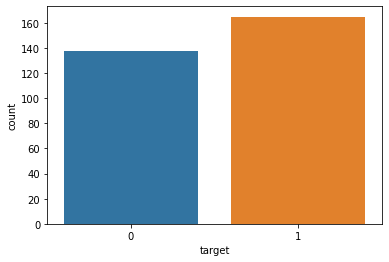

In [6]:
sns.countplot(x= df["target"])

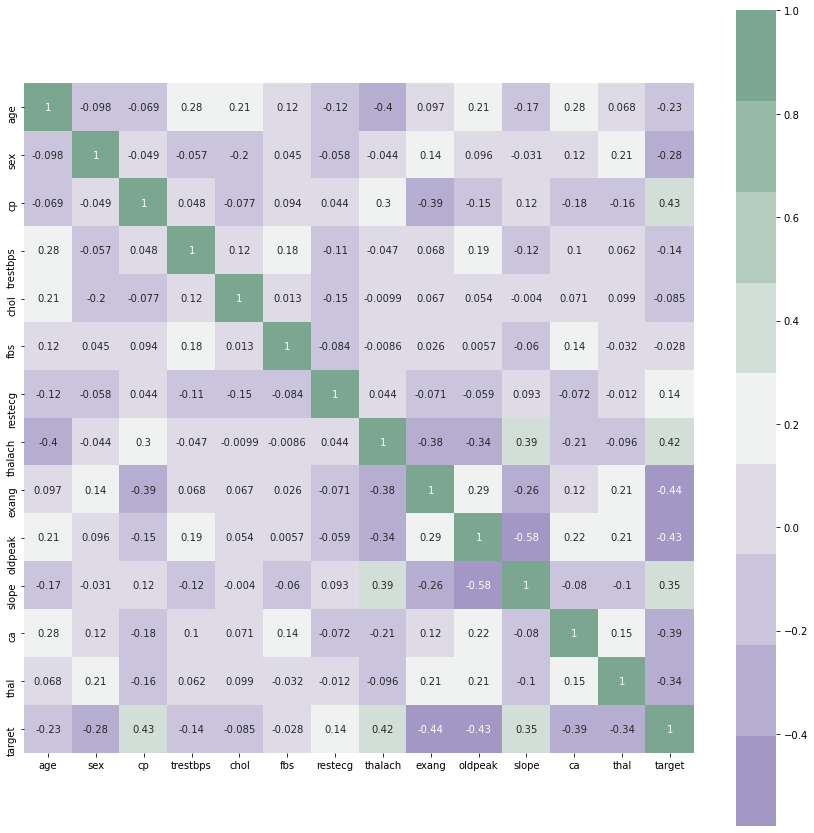

In [7]:
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

<AxesSubplot:xlabel='age', ylabel='count'>

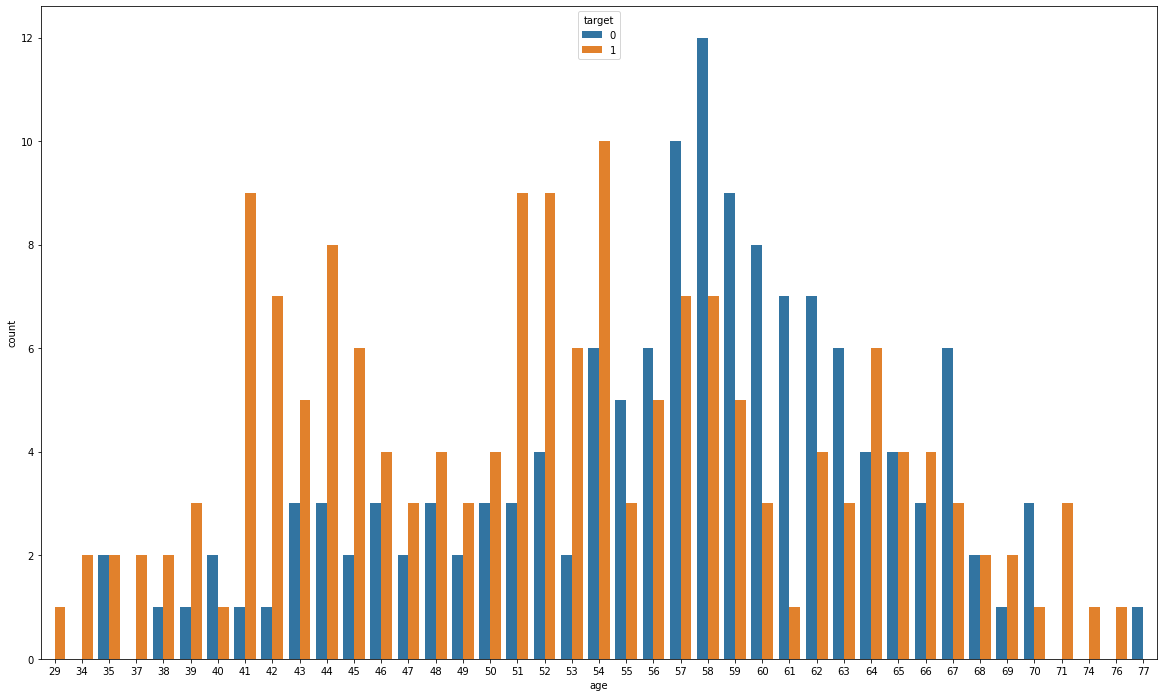

In [43]:
#countplot for age vs target as age is highly correlated  with the target 
plt.figure(figsize=(20,12))
sns.countplot(x=df['age'],data=df, hue ="target")



In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# **<span style="color:#6daa9f;">DATA PREPROCESSING</span>**

**Steps involved in Data Preprocessing** 
* Dropping the outliers based on data analysis
* Assigning values to features as X and target as y
* Perform the scaling of the features
* Split test and training sets

In [10]:
X=df.drop(["target"],axis=1)
y=df["target"]

In [11]:
#important statistics
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,5.825923e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
sex,303.0,-1.319077e-17,1.001654,-1.468418,-1.468418,0.681005,0.681005,0.681005
cp,303.0,-5.562565e-17,1.001654,-0.938515,-0.938515,0.032031,1.002577,1.973123
trestbps,303.0,-7.146832e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
chol,303.0,-9.828955e-17,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
fbs,303.0,-3.664102e-19,1.001654,-0.417635,-0.417635,-0.417635,-0.417635,2.394438
restecg,303.0,2.652810e-16,1.001654,-1.005832,-1.005832,0.898962,0.898962,2.803756
thalach,303.0,-5.203025e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
exang,303.0,-5.203025e-16,1.001654,-0.696631,-0.696631,-0.696631,1.435481,1.435481
oldpeak,303.0,-3.140136e-16,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


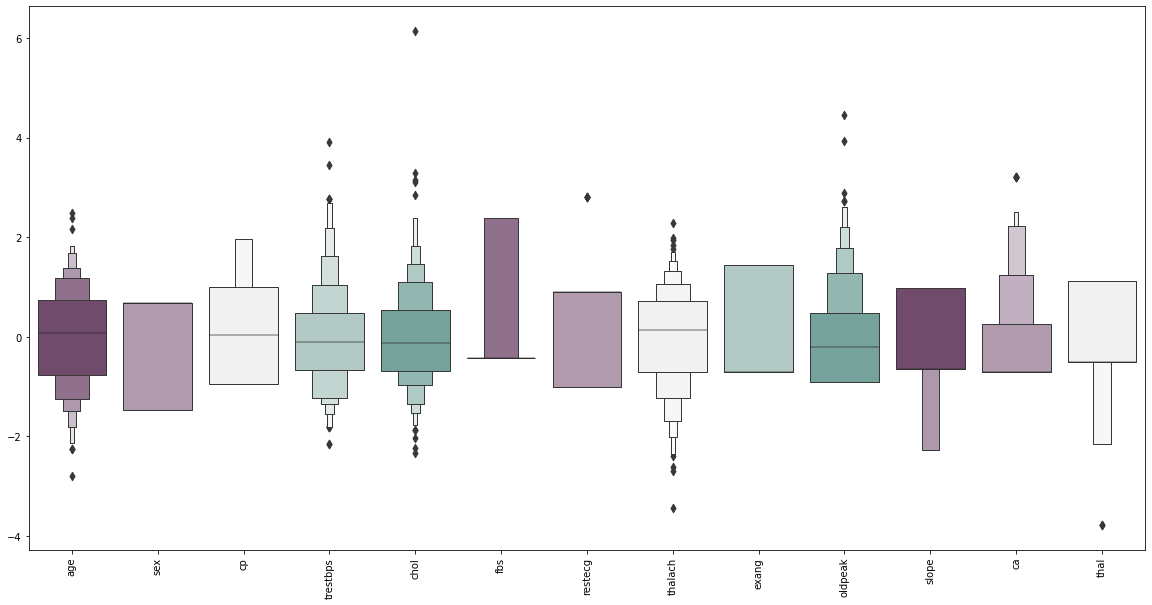

In [12]:
#boxenplot
colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = colours)
plt.xticks(rotation=90)
plt.show()

I spotted outliers on our dataset. I didn't remove them yet as it may lead to overfitting. Though we may end up with better statistics. In this case, with medical data, the outliers may be an important deciding factor.

# **<span style="color:#6daa9f;">MODEL BUILDING</span>**

In this project, we build an artificial neural network.

**Following steps are involved in the model building**
* Initialising the ANN
* Defining by adding layers
* Compiling the ANN
* Train the ANN

In [13]:
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

In [73]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units =11, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units =5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))



# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs =500, validation_split=0.2)

Epoch 1/500
6/6 [==============================] - 1s 87ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 2/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 3/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 4/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 5/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 6/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 8/500
6/6 [=========

6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 60/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 61/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 62/500
6/6 [==============================] - ETA: 0s - loss: 8.6765 - accuracy: 0.43 - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 63/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 64/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 65/500
6/6 [==============================] - 0s 12ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accurac

Epoch 117/500
6/6 [==============================] - 0s 10ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 118/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 119/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 120/500
6/6 [==============================] - 0s 10ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 121/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 122/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 123/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 124/5

Epoch 175/500
6/6 [==============================] - 0s 10ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 176/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 177/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 178/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 179/500
6/6 [==============================] - 0s 10ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 180/500
6/6 [==============================] - 0s 10ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 181/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 182/

Epoch 233/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 234/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 235/500
6/6 [==============================] - 0s 12ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 236/500
6/6 [==============================] - 0s 11ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 237/500
6/6 [==============================] - 0s 11ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 238/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 239/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 240/

Epoch 291/500
6/6 [==============================] - 0s 10ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 292/500
6/6 [==============================] - 0s 10ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 293/500
6/6 [==============================] - 0s 10ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 294/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 295/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 296/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 297/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 298/

6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 349/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 350/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 351/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 352/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 353/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 354/500
6/6 [==============================] - 0s 10ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 355/500
6/6 [=======

6/6 [==============================] - 0s 7ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 407/500
6/6 [==============================] - 0s 7ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 408/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 409/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 410/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 411/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 412/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 413/500
6/6 [========

6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 465/500
6/6 [==============================] - 0s 8ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 466/500
6/6 [==============================] - 0s 7ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 467/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 468/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 469/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 470/500
6/6 [==============================] - 0s 9ms/step - loss: 8.4883 - accuracy: 0.4497 - val_loss: 7.8918 - val_accuracy: 0.4884
Epoch 471/500
6/6 [========

In [74]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 48.84%


# **<span style="color:#6daa9f;">CONCLUSIONS</span>**

**Concluding the model with:**

* Testing on the test set
* Evaluating the confusion matrix
* Evaluating the classification report

In [75]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

<AxesSubplot:>

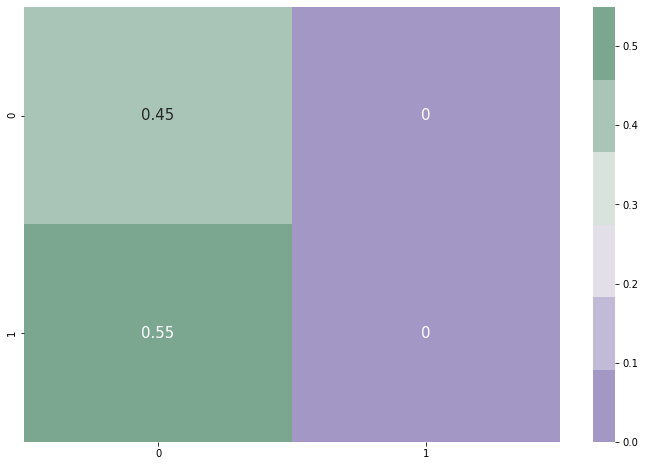

In [76]:
# confusion matrix
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        41
           1       0.00      0.00      0.00        50

    accuracy                           0.45        91
   macro avg       0.23      0.50      0.31        91
weighted avg       0.20      0.45      0.28        91



D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
